In [11]:
import open3d as o3d
import numpy as np
from PIL import Image

left =  np.asarray(Image.open('cones/conesF/im2.ppm').convert('L'))
#disparity = np.asarray(Image.open('cones/conesF/disp2.pgm').convert('L'))
disparity = np.asarray(Image.open('JBFU/upsampled.png').convert('L'))

print(disparity)

scale = 9.88
f = 3740
b = 160

disparity_matrix = disparity
disparity_matrix = (f/scale) * (b/scale) / disparity_matrix

img = o3d.geometry.Image(left.astype('uint8'))
depth = o3d.geometry.Image(disparity_matrix.astype(np.uint16))


rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(img, depth)
o3d_pinhole = o3d.camera.PinholeCameraIntrinsic()

o3d_pinhole.set_intrinsics(
    left.shape[1], left.shape[0], f, f, 0.5 * left.shape[0], 0.5 * left.shape[1]
)

pcd_from_depth_map = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, o3d_pinhole)

pcd_from_depth_map.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd_from_depth_map])

[[ 68  68  68 ... 142 131 123]
 [ 68  68  68 ... 128 122 121]
 [ 68  68  68 ... 116 114 117]
 ...
 [212 213 214 ... 181 181 181]
 [212 212 213 ... 185 184 184]
 [212 213 213 ... 186 186 186]]


<ipython-input-11-5a831a81489b>:16: RuntimeWarning: divide by zero encountered in true_divide
  disparity_matrix = (f/scale) * (b/scale) / disparity_matrix


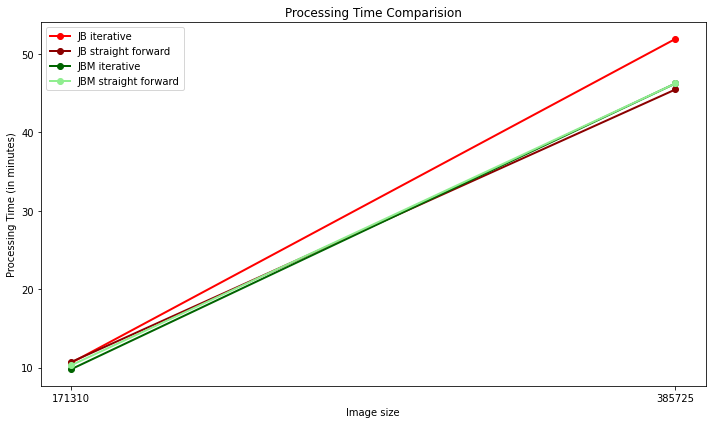

In [9]:
import numpy as np
import matplotlib.pyplot as plt

sizes = np.array([463*370, 695*555, ]) #1390*1110
jb_sf = np.array([636,3115,]) / 60
jb_it = np.array([642,2728,]) / 60
jbm_sf = np.array([587,2774,]) /60
jbm_it = np.array([617,2774,]) / 60 

# Plotting both the curves simultaneously
plt.figure(figsize=(10,6), tight_layout=True)#plotting
plt.plot(sizes, jb_sf,'o-', color='red', label='JB iterative', linewidth=2)
plt.plot(sizes, jb_it,'o-', color='darkred', label='JB straight forward', linewidth=2)
plt.plot(sizes, jbm_sf, 'o-', color='darkgreen', label='JBM iterative',linewidth=2)
plt.plot(sizes, jbm_it, 'o-', color='lightgreen', label='JBM straight forward',linewidth=2)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Image size")
plt.xticks(sizes)
plt.ylabel("Processing Time (in minutes)")
plt.title("Processing Time Comparision") 
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
# To load the display window
plt.savefig("docs/processing_time.png")
plt.show()


In [66]:
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
from PIL import Image
import numpy as np

naive_err_ssim = []
naive_err_rmse = []
naive_err_psnr = []

dp_err_ssim = []
dp_err_rmse = []
dp_err_psnr = []

opencv_err_ssim = []
opencv_err_rmse = []
opencv_err_psnr = []

jb_err_ssim = []
jb_err_rmse = []
jb_err_psnr = []


norm = lambda arr: arr#((arr-np.min(arr)) *255 / (np.max(arr) - np.min(arr))).astype(np.uint8)

for w_size in [0]:

    ssim_sum = [[],[],[],[]]
    rmse_sum = [[],[],[],[]]
    psnr_sum = [[],[],[],[]]
    images = ['Books', 'Dolls', 'Laundry', 'Moebius', 'Reindeer']
    #https://towardsdatascience.com/measuring-similarity-in-two-images-using-python-b72233eb53c6
    #for metrics value reference

    outputs_source = 'outputs/scenes_2005_medium/scenes_2005/'

    for source in images:
        real_disp = np.asarray(Image.open('data/scenes_2005/' + source + '/disp_real.png').convert('L'))
        
        disp =  norm(np.asarray(Image.open(outputs_source + source + '/jb_it.png').convert('L')))
        ssim_sum[0].append(ssim(disp,real_disp)[0])
        rmse_sum[0].append(rmse(disp,real_disp))
        psnr_sum[0].append(psnr(disp,real_disp))

        disp =  norm(np.asarray(Image.open(outputs_source + source + '/jb_sf.png').convert('L')))
        ssim_sum[1].append(ssim(disp,real_disp)[0])
        rmse_sum[1].append(rmse(disp,real_disp))
        psnr_sum[1].append(psnr(disp,real_disp))

        disp =  norm(np.asarray(Image.open(outputs_source + source + '/jbm_it.png').convert('L')))
        ssim_sum[2].append(ssim(disp,real_disp)[0])
        rmse_sum[2].append(rmse(disp,real_disp))
        psnr_sum[2].append(psnr(disp,real_disp))


        disp =  norm(np.asarray(Image.open(outputs_source + source + '/jbm_sf.png').convert('L')))
        ssim_sum[3].append(ssim(disp,real_disp)[0])
        rmse_sum[3].append(rmse(disp,real_disp))
        psnr_sum[3].append(psnr(disp,real_disp))
    
    naive_err_ssim.append(ssim_sum[0])
    dp_err_ssim.append(ssim_sum[1])
    opencv_err_ssim.append(ssim_sum[2])
    jb_err_ssim.append(ssim_sum[3])

    naive_err_rmse.append(rmse_sum[0])
    dp_err_rmse.append(rmse_sum[1])
    opencv_err_rmse.append(rmse_sum[2])
    jb_err_rmse.append(rmse_sum[3])

    naive_err_psnr.append(psnr_sum[0])
    dp_err_psnr.append(psnr_sum[1])
    opencv_err_psnr.append(psnr_sum[2])     
    jb_err_psnr.append(psnr_sum[3])


In [35]:
import pandas as pd

In [74]:
#arr = np.array([naive_err_ssim[0], dp_err_ssim[0], opencv_err_ssim[0], jb_err_ssim[0]]).T
#arr = np.array([naive_err_rmse[0], dp_err_rmse[0], opencv_err_rmse[0], jb_err_rmse[0]]).T
arr = np.array([naive_err_psnr[0], dp_err_psnr[0], opencv_err_psnr[0], jb_err_psnr[0]]).T


df = pd.DataFrame(arr, columns = ['JB Iter','JB','JBM Iter', 'JBM '])

In [75]:
df

,JB Iter,JB,JBM Iter,JBM
0,29.497112,29.497112,27.685969,27.685969
1,30.613452,30.613452,28.424591,28.424591
2,32.417581,32.417581,29.778352,29.778352
3,30.754696,30.754696,28.270970,28.270970
4,32.284895,32.284895,29.583697,29.583697


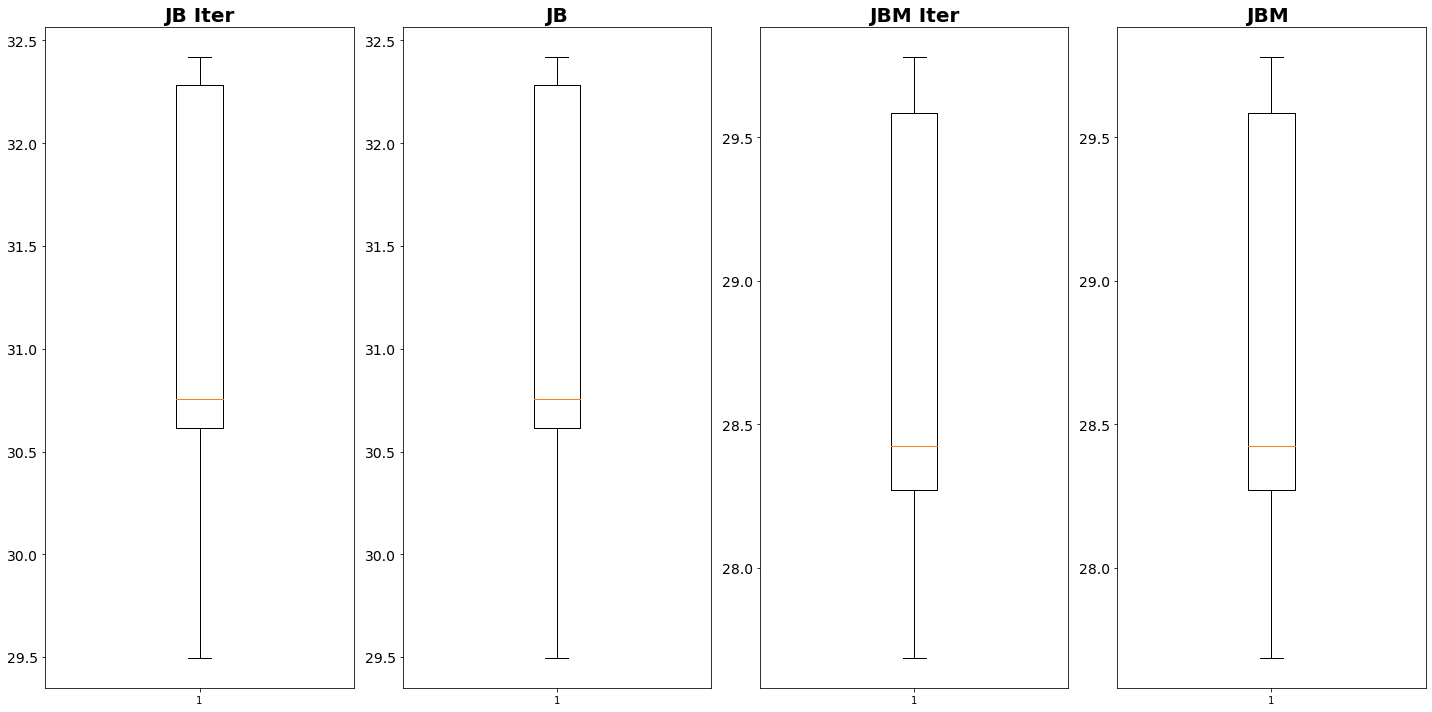

In [76]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    #Checking if column names are equal to columns we expect to be logarithmic
    if df.columns[i] == 'RDEP' or df.columns[i] == 'RMED':
        ax.semilogy()
    
plt.tight_layout()